In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
import statistics
from statistics import median
import os

In [2]:
df = pd.read_csv(r'/Users/morty/Desktop/HCV/HCV.csv')
df

,matchid,groupid,subgroup,ra,dec,pipeline_class,expert_class,filter,num_filters,var_quality_flag,...,lightcurve_d,lightcurve_m,lightcurve_cm,lightcurve_e,lightcurve_i,lightcurve_r,ci_d,ci_v,d_d,d_v
0,352,1040910,26,269.790894,-29.248819,1,0,ACS_F606W,2,AAAAC,...,55855.000881,25.631300,25.636757,0.1070,hst_12586_03_acs_wfc_f606w,False,55855.000881,1.093611,55855.000881,6.084347
1,352,1040910,26,269.790894,-29.248819,1,0,ACS_F606W,2,AAAAC,...,56001.959890,26.200701,26.195594,0.1815,hst_12586_10_acs_wfc_f606w,False,56001.959890,0.635000,56001.959890,2.961927
2,352,1040910,26,269.790894,-29.248819,1,0,ACS_F606W,2,AAAAC,...,56052.841962,26.034100,26.046429,0.1469,hst_12586_22_acs_wfc_f606w,False,56052.841962,0.824907,56052.841962,5.407275
3,352,1040910,26,269.790894,-29.248819,1,0,ACS_F606W,2,AAAAC,...,56109.701472,25.735399,25.760180,0.1854,hst_12586_35_acs_wfc_f606w,False,56109.701472,0.933519,56109.701472,4.572665
4,352,1040910,26,269.790894,-29.248819,1,0,ACS_F606W,2,AAAAC,...,56121.406559,25.626101,25.640382,0.0986,hst_12586_39_acs_wfc_f606w,False,56121.406559,1.029815,56121.406559,3.149204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2576369,108169792,1063416,12,269.609375,-29.169004,2,0,WFC3_F814W,2,AAABC,...,56716.158792,20.118099,20.122682,0.0061,hst_13463_08_wfc3_uvis_f814w,False,56716.158792,1.415333,56716.158792,2.586158
2576370,108169792,1063416,12,269.609375,-29.169004,2,0,WFC3_F814W,2,AAABC,...,56732.954985,20.060400,20.060412,0.0058,hst_13463_12_wfc3_uvis_f814w,False,56732.954985,1.374222,56732.954985,6.504886
2576371,108169792,1063416,12,269.609375,-29.169004,2,0,WFC3_F814W,2,AAABC,...,56764.960344,20.134701,20.137863,0.0063,hst_13463_20_wfc3_uvis_f814w,False,56764.960344,1.420444,56764.960344,4.001287
2576372,108169792,1063416,12,269.609375,-29.169004,2,0,WFC3_F814W,2,AAABC,...,56784.897984,20.104401,20.095573,0.0057,hst_13463_24_wfc3_uvis_f814w,False,56784.897984,1.412222,56784.897984,3.657708


### Generate Lightcurve Function

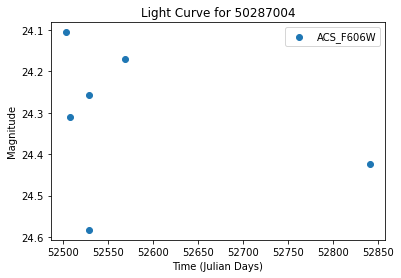

In [23]:
#Similar design as the get_filter function, essentially takes a matchid as input and outputs a scatter plot
#from magnitude and time

def make_lightcurve(matchid):
    mag_list = []
    time_list = []
    tuple_list = []
    filter_list = []
    count = 0
    #plt.figure(figsize = (11,11))
    
    #specify that the dataframe we want is the same as the matchid inputed into our function
    matchid_df = df.loc[df['matchid'] == matchid].reset_index()
    
    for i in range(len(matchid_df) - 1): #len is -1 since updated is i+1, so we'll have it looping through until it
        #gets to the end of our specific filter list
        current_filter = matchid_df['filter'][i] #current filter
        updated_filter = matchid_df['filter'][i+1] #next filter
        
        #Conditions here are if the filters are the same, append it, if i does not equal the last filter, append
        #that, as well. This allows us to continue looping through the matchid dataframe and stop when there's nothing
        #left to append.
        if (current_filter == updated_filter) & (i != len(matchid_df)- 2):
            mag_list.append(matchid_df['lightcurve_m'][i])
            time_list.append(matchid_df['lightcurve_d'][i])
            
            
            count+=1
            
        elif i == (len(matchid_df) - 2):
            mag_list.append(matchid_df['lightcurve_m'][i])
            time_list.append(matchid_df['lightcurve_d'][i])
            mag_list.append(matchid_df['lightcurve_m'][i+1])
            time_list.append(matchid_df['lightcurve_d'][i+1])
            tuple_list.append(list(zip(time_list, mag_list)))
            
            
            #appends updated filter to our list, or the last filter in our matchid
            filter_list.append(updated_filter)

            
            count+=2
            
        else:
            mag_list.append(matchid_df['lightcurve_m'][i])
            time_list.append(matchid_df['lightcurve_d'][i])
            tuple_list.append(list(zip(time_list, mag_list)))
            
            #appends the current filter if current_filter != updated_filter, then will append the updated_filter
            #when the for loop goes back through, until we're left with one final filter which gets appended
            #in the elif statement
            filter_list.append(current_filter)
                        
            count+=1
            
            #clear the lists
            mag_list = []
            time_list = []
            
    #We want two tuples in our list that have all the data points for each filter so that it can plot them separately
    #as different colors.
    #index each value within tuple_list
    for s in range(len(tuple_list)):
        
        #Create a scatter plot of the values within tuple_list, then label them according to the appended filter_list
        #above. The zip and * is to scatter points that are in the form of a list.
        plt.scatter(*zip(*tuple_list[s]), label = filter_list[s])
        plt.xlabel('Time (Julian Days)')
        plt.ylabel('Magnitude')
        plt.title('Light Curve for ' + str(matchid)) 

    #invert y axis since magnitude goes high to low
    plt.gca().invert_yaxis()
    plt.legend()
    plt.savefig(str(matchid) + '_lightcurve.jpeg')
    plt.show()

make_lightcurve(50287004)

### Putting matchids in the form of a list

In [4]:
#turns a groupid into a dictionary that reads back the number of unique matchids it has
def get_dict_matchids_groupid(groupid):
    
    #create a df of the input groupid
    groupid_df = df.loc[df['groupid'] == groupid]
    #find all unique matchids
    unique_matchids = groupid_df.matchid.unique()
    #count them up
    num_unique_matchids = len(unique_matchids)
    #store them in a dictionary
    return {'groupid': groupid, 'num unique matchids': num_unique_matchids}

groupids = df.groupid.unique()

#create a groupid_df dataframe
groupid_data = {'groupid': [], 'num unique matchids': []}
groupid_df = pd.DataFrame(groupid_data)

#append all groupids to a dataframe
for groupid in groupids:
    groupid_df = groupid_df.append(get_dict_matchids_groupid(groupid), ignore_index = True)
    
#locate and create a dataframe of all the groupids that only have one unique matchid    
groupids_1_df = groupid_df.loc[groupid_df['num unique matchids'] == 1].reset_index()
groupids_1_df = groupids_1_df.iloc[:,1:]

#function for turning the unique matchids from a single groupid into a list
def get_list_matchids_groupid(groupid):
    #set a new dataframe of just the input groupid
    groupid_df = df.loc[df.groupid==groupid]
    
    #find all the unique matchids and store them in a list
    return groupid_df.matchid.unique()


def get_matchid_master(groupid_df):
    #our master matchids list
    matchids_master = []
    
    #iterate through each row of groupid_df
    for i in range(len(groupid_df)):
        #storing each unique matchid in a variable, use get_list_matchids_groupid to find these
        matchids_for_groupid = get_list_matchids_groupid(groupid_df['groupid'][i])
        
        #append each matchid to the list
        for matchid in matchids_for_groupid:
            matchids_master.append(matchid)
    
    return matchids_master

get_matchid_master(groupids_1_df)

[6398359,
 17884928,
 24374301,
 26945443,
 38243786,
 45812422,
 50287004,
 55755127,
 69470046]

### Feature Vector Part 1

In [5]:
#define our feature vector for a matchid function, just continuing to manipulate data
def feature_vector_p1(matchid):
    #find the matchid within our dataframe and give it its own variable
    matchid_df = df.loc[df['matchid'] == matchid]
    
    #find all the unique filters associated to that matchid
    unique_filter_list = matchid_df['filter'].unique()
    
    #create two empty lists
    median_mag_list = []
    delta_time = []
    mad_list = []
    chi2_list = []
    
    
    #now we iterate, for each filter within our filter list
    for item in unique_filter_list:
        #find a filter
        matchid_filter_df = matchid_df.loc[matchid_df['filter']==item].reset_index()
        
        #get its lightcurve_d data
        matchid_filter_time_list = list(matchid_filter_df['lightcurve_d'])
        
        #get the min and max time values from our list of lightcurve_d
        min_time = matchid_filter_time_list[0]
        max_time = matchid_filter_time_list[-1]
        
        #find the difference
        total_time_diff = max_time-min_time
        #append this difference
        delta_time.append(total_time_diff)
        
        #appending the median mag values for each lightcurve
        median_mag = median(matchid_filter_df['lightcurve_m'].values)
        median_mag_list.append(median_mag)
        
        mad_list.append(matchid_filter_df['mad'].values[0])
        chi2_list.append(matchid_filter_df['chi2'].values[0])
        
        num_unique_filter_list = len(unique_filter_list)
        
    #find the maximum, minimum, and median of the median magnitude lists
    max_median_mag = min(median_mag_list)
    min_median_mag = max(median_mag_list)
    median_median_mag = median(median_mag_list)
    
    #find the index of our filter within the mean_mag_list for max and min
    #max_mean_mag_index = mean_mag_list.index(max_mean_mag)
    #max_mean_mag_filter = unique_filter_list[max_mean_mag_index]
    
    #min_mean_mag_index = mean_mag_list.index(min_mean_mag)
    #min_mean_mag_filter = unique_filter_list[min_mean_mag_index]
    
    #find the minimum delta time for our list
    min_total_time = min(delta_time)
    max_total_time = max(delta_time)
    
    #compute medians for MAD and chi2
    median_mad = median(mad_list)
    median_chi2 = median(chi2_list)
    
    
    #now do it for time
    #max_total_time_index = delta_time.index(max_total_time)
    #max_total_time_filter = unique_filter_list[max_total_time_index]
    
    #min_total_time_index = delta_time.index(min_total_time)
    #min_total_time_filter = unique_filter_list[min_total_time_index]
    
    
    #function to find galactic coordinates from ra and dec, these change every 26000 years, so make sure you update!
    def galactic_coordinates(wx, wy):
        #conversion function
        c = SkyCoord(ra=wx*u.degree, dec=wy*u.degree, frame='icrs')
        #returns in the form of degrees for galactic longitude and latitude
        return c.galactic.l.deg, c.galactic.b.deg
    
    #extract ra and dec of the object and convert it into galactic coordinates, need .values to get it in the form
    #of a dataframe
    ra, dec = matchid_df.ra.values[0], matchid_df.dec.values[0]
    
    #set our galactic coordinates
    l, b = galactic_coordinates(ra, dec)
    
    #this will count all of the matchids that share a groupid
    groupid = matchid_df.groupid.values[0]
    matchids_groupid_list = get_list_matchids_groupid(matchid_df.groupid.values[0])
    num_other_matchids_groupid = len(matchids_groupid_list)-1
    
    #return it as a dictionary (easy to print and then easy to create into a dataframe that way)
    return {'matchid': matchid, 'groupid': groupid, 'number of matchids sharing groupid': num_other_matchids_groupid
            , 'num unique filters': num_unique_filter_list, 'min median mag': min_median_mag
            , 'max median mag': max_median_mag, 'median median mag': median_median_mag
            , 'median mad': median_mad, 'median chi2': median_chi2
            , 'min delta T': min_total_time, 'max delta T': max_total_time
            , 'RA': ra, 'DEC': dec, 'galactic longitude': l, 'galactic latitude': b}

feature_vector_p1(12670)

{'matchid': 12670,
 'groupid': 33470,
 'number of matchids sharing groupid': 1420,
 'num unique filters': 3,
 'min median mag': 23.159000000000002,
 'max median mag': 20.755000000000003,
 'median median mag': 22.0058,
 'median mad': 0.0434359394147954,
 'median chi2': 7.129302546930129,
 'min delta T': 1.204467604176898,
 'max delta T': 1.2426042708102614,
 'RA': 138.01878356933594,
 'DEC': -64.86891174316406,
 'galactic longitude': 282.1988241347117,
 'galactic latitude': -11.25437364603963}

### Fluid Noise Threshold using CASJOBs to bin and find it

In [6]:
#import our SWEEPS csv from our casjobs tutorial
sweeps = pd.read_csv(r'/Users/morty/Desktop/HCV/Resolved HSC Targets/SWEEPS6_ghirsch.csv')

#split SWEEPS into f_606w and f_814w dataframes
sweeps_606df = sweeps.filter(['ObjID', 'RA', 'Dec', 'a_f606w', 'a_f606w_n', 'a_f606w_mad'], axis = 1)
sweeps_814df = sweeps.filter(['ObjID', 'RA', 'Dec', 'a_f814w', 'a_f814w_n', 'a_f814w_mad'], axis = 1)

#our bins
mag_bin_list = [(12.43, 19), (19, 21), (21, 23), (23, 24), (24, 24.5), (24.5, 25), (25, 25.5), (25.5, 26)
                , (26, 26.5), (26.5, 27)]

#empty dataframe to hold all of our bins and thresholds
threshold_bins_data = {'min mag': [], 'max mag': [], 'mmad 606': [], 'mmad 814': []}
threshold_bins_df = pd.DataFrame(threshold_bins_data)

#for each tuple within mag_bin_list get a dataframe from sweeps where the magnitude is in between the values of our
#tuples
for mag_bin in mag_bin_list:
    
    mag_bin_average_606_df = sweeps_606df.loc[(sweeps_606df['a_f606w'] > mag_bin[0]) & 
                                              (sweeps_606df['a_f606w'] <= mag_bin[1])]
    mag_bin_average_814_df = sweeps_814df.loc[(sweeps_814df['a_f814w'] > mag_bin[0]) & 
                                               (sweeps_814df['a_f814w'] <= mag_bin[1])]
    
    #check to see if there are any values within our dataframes
    if (len(mag_bin_average_606_df) != 0) & (len(mag_bin_average_814_df) != 0):
    
        mad_606 = mag_bin_average_606_df['a_f606w_mad'].values
        mad_814 = mag_bin_average_814_df['a_f814w_mad'].values

        median_mad_606 = median(mad_606)
        median_mad_814 = median(mad_814)

        threshold_bins_df = threshold_bins_df.append({'min mag': mag_bin[0], 'max mag': mag_bin[1], 
                                                    'mmad 606': median_mad_606, 'mmad 814': median_mad_814}
                                                     , ignore_index = True)
    
    else:
        threshold_bins_df = threshold_bin_df.append({'min mag': mag_bin[0], 'max mag': mag_bin[1], 
                                                    'mmad 606': np.nan, 'mmad 814': np.nan}, ignore_index = True)
        
threshold_bin_df = pd.read_csv(r'/Users/morty/Desktop/HCV/threshold_bins_df.csv')
threshold_bin_df = threshold_bin_df.iloc[:,1:]

        
#edited get_threshold function
def get_threshold(matchid, filter_type):
    return 0.015

### Function to fix np.argmax issue

In [7]:
#helper function to return the index of the max value of a list of tuples
def get_max_index_tuple(tuple_list, tuple_index, max_value):
    for i, value in enumerate(tuple_list):
        #if we've reached the desired max value for the given tuple_index, return the index
        if value[tuple_index] == max_value:
            return i
    #if we don't return any index through the for loop then return nan
    return np.nan

### Classifier, breaking up the classifier, and classifying pairs

In [8]:
def make_classified(matchid, list_of_tuples, threshold):
    #defining our classified string that holds the result of +-0
    #by default start with a #
    classified = '#'
        
    #initialize list to hold starting time, delta time, and delta mag for each character
    t_dt_dm = []
        
    #a for loop to iterate over the (time, mag) tuples and calculate pointwise difference
    #subtract 2 so we don't compare the last index to a nonexistant index
    for i in range(len(list_of_tuples) - 1):
        
        #find initial time value
        t0 = list_of_tuples[i][0]
        #find delta m and delta t
        dm = list_of_tuples[i][1] - list_of_tuples[i+1][1]
        dt = list_of_tuples[i+1][0] - t0

        #case 1 is when the delta mag is above the threshold
        if (abs(dm) >= threshold) & (dm > 0):
            classified += '+'

        #case 2 is when the delta mag is the exact same as the threshold, very rare
        elif (abs(dm) >= threshold) & (dm == 0):
            classified += '0'
            
        #case 3 is when the delta mag is less than the threshold, meaning it's less than 0 and below the [i] point    
        elif (abs(dm) >= threshold) & (dm < 0):
            classified += '-'
       
        #this is just an else statement if all else fails, we put in a 0 which should never happen
        else:
            classified += '0'
        
        #append a tuple of starting time, delta t, and delta mag to an event list
        t_dt_dm.append((t0, dt, dm))
        
    #return our classified string, as well as the time, delta mag, and delta time for each character 
    return classified, t_dt_dm
'''

#breaking up the total classify string into pairs 
#don't want to break it up this way anymore, too arbitrary...
def breakup(classified):
    pairs_list = []
    
    for i in range(len(classified)-1):
        first = classified[i]
        second = classified[i+1]
        
        pair = first + second
        pairs_list.append(pair)
        
    return pairs_list

#classifying pairs from our breakup string

def classify_pairs(pair):
    
    #list of conditions for flare up, flare down, flare up down, flare down up, and flat
    first = pair[0]
    second = pair[1]
    
    #flare up
    if (((first == '#') & (second == '+')) or ((first == '0') & (second == '+')) or ((first == '+') & (second == '+'))):
        #return a string indicating the classification
        return 'Flare Up'
    
    #up stop
    elif (((first == '+') & (second == '0')) or ((first == '+') & (second == '-'))):
        return 'Up Stop'
       
    #flare down
    elif (((first == '#') & (second == '-')) or ((first == '0') & (second == '-')) or ((first == '-') & (second == '-'))):
        #return a string indicating the classification
        return 'Flare Down'
    
    #down stop
    elif (((first == '-') & (second == '0')) or ((first == '-') & (second == '+'))):
        return 'Down Stop'
    
    #flat top
    else:
        return 'Flat'
        
'''

#RIP Lone Ranger

#given a list of classifed pairs and a list of tuples of start time, delta t, and delta mag that corresponds to each
#of the right characters in the pair, it'll return a list of flare up, flare down, and flat that consolidateds
#multiple events into distinct unique events, and record a list of tuples of total delta t and total detal mag
def consolidate_events(classified, t_dt_dm):
    
    #initialize lists to hold starting time, delta time, and delta mag
    flare_up_list = []
    flare_down_list = []
    flat_list = []
    #initialize our variables
    t0 = 0
    dt = 0
    dm = 0
    
    i = 0
    
    classified = classified.replace('#', '')
    
    #iterate through all classified pairs
    while i < len(classified):
        #assign t_dt_dm to each specific variable
        t0 = t_dt_dm[i][0]
        dt = t_dt_dm[i][1]
        dm = t_dt_dm[i][2]
        #lets check +, -, 0
        #now combine our ups, downs, and flats
        if classified[i] == '+':
            
            #this is if a flare up is the final character
            if i == len(classified)-1:
                flare_up_list.append((t0, dt, dm))
                        
            #need this else statement when the above is not true, when the last character is not a flare up
            else:
            
                #lets start indexing at i+1 because we want to check the next index
                for j in range(i+1, len(classified)):
                    #if we're down
                    if classified[j] == '+':
                        #add times and magnitudes to the overal delta time and delta mag
                        dt+=t_dt_dm[j][1]
                        dm+=t_dt_dm[j][2]
                        
                        if j == len(classified)-1:
                            flare_up_list.append((t0, dt, dm))
                            
                            #increment i by however many indexes we got through in our sub loop
                            i+=(j-i)
                            break

                    else:
                        #append and reset
                        flare_up_list.append((t0, dt, dm))

                        t0 = 0
                        dt = 0
                        dm = 0
                        
                        #increment i by however many indexes we got through in our sub loop
                        i += (j-i-1)
                        #break from the for loop
                        break
        
        #for the down
        elif classified[i] == '-':
            
            #this is if a flare down is the final character
            if i == len(classified)-1:
                flare_down_list.append((t0, dt, dm))
            
            #need this else statement when the above is not true, when the last character is not a flare down
            else:
            
                #lets start indexing at i+1 because we want to check the next index
                for j in range(i+1, len(classified)):
                    #if we're down
                    if classified[j] == '-':
                        #add times and magnitudes to the overal delta time and delta mag
                        dt+=t_dt_dm[j][1]
                        dm+=t_dt_dm[j][2]
                        
                        if j == len(classified)-1:
                            flare_down_list.append((t0, dt, dm))
                            
                            #increment i by however many indexes we got through in our sub loop
                            i+=(j-i)
                            break

                    else:
                        #append and reset
                        flare_down_list.append((t0, dt, dm))

                        t0 = 0
                        dt = 0
                        dm = 0
                        
                        #increment i by however many indexes we got through in our sub loop
                        i += (j-i-1)
                        #break from the for loop
                        break

        else:
            #this is if a flat is the final character
            if i == len(classified)-1:
                flat_list.append((t0, dt, dm))
                
            #need this else statement when the above is not true, when the last character is not a flat   
            else:
                #lets start indexing at i+1 because we want to check the next index
                for j in range(i+1, len(classified)):
                    #if we're flat
                    if classified[j] == '0':
                        #add times and magnitudes to the overal delta time and delta mag
                        dt+=t_dt_dm[j][1]
                        dm+=t_dt_dm[j][2]
                        
                        if j == len(classified)-1:
                            flat_list.append((t0, dt, dm))
                            
                            #increment i by however many indexes we got through in our sub loop
                            i+=(j-i)
                            break

                    else:
                        #hit something different so we append and then move on
                        flat_list.append((t0, dt, dm))

                        t0 = 0
                        dt = 0
                        dm = 0
                        
                        #increment i by however many indexes we got through in our sub loop
                        i += (j-i-1)
                        #break from the for loop
                        break
        i+=1
    return flare_up_list, flare_down_list, flat_list
    

### Classifying our classified curves

In [9]:
def master_classifier(matchid, list_of_tuples, filter_type):
    #retrieves the threshold value from our function
    threshold = get_threshold(matchid, filter_type)
    
    #generate classified string and our list, two variables!
    classified, t_dt_dm = make_classified(matchid, list_of_tuples, threshold)
        
    #call consolidate_events function to return our list of list of tuples for flare up, down, and flat
    #each list will hold this tuple along with delta t and delta mag
    flare_up_list, flare_down_list, flat_list = consolidate_events(classified, t_dt_dm)
        
    #return lists for each event type
    return flare_up_list, flare_down_list, flat_list

### Classifying our lightcurves

In [10]:
#trying to make a function that takes in a matchid and looks at the filter for each one, then for each unique filter
#a dataframe is created that just has the matchid and filter data
#then create a blank list that stores our time_mag tuples, for each row in this df, append a tuple of the time and mag
#at each row, then append this list of tuples to a larger list and pass that list into the classifier function
def implement_classifier(matchid):
    
    #big boy list
    list_list_time_mag = []
    
    #create matchid_df
    matchid_df = df.loc[df['matchid'] == matchid].reset_index()
    
    #get all unique filters
    unique_filter_list = matchid_df['filter'].unique()
    
    #for each item within this unique filter list
    for item in unique_filter_list:
        
        #create a df for each filter that goes with the matchid
        filter_matchid_df = matchid_df.loc[matchid_df['filter'] == item]
        
        #create an empty time_mag list
        time_mag_list = []
        
        #iterate through each row in the filter matchid df
        for i in range(len(filter_matchid_df)):
            
            #append the lightcurve d and lightcurve m values to the time_mag list
            time_mag_list.append((filter_matchid_df['lightcurve_d'].values[i], filter_matchid_df['lightcurve_m'].values[i]))
            
            
        #then append these tuples to the larger list as a whole     
        list_list_time_mag.append(time_mag_list)
        
        #create an empty classifier list
        master_up = []
        master_down = []
        master_flat = []
        
        #enumerate allows us to log both the index and the value in whatever we're iterating over
        for i, time_mag in enumerate(list_list_time_mag): #for each list of tuples in tuple list
            
            filter_type = unique_filter_list[i]
                        
            flare_up_list, flare_down_list, flat_list = master_classifier(matchid, time_mag, filter_type)
            
            master_up.append(flare_up_list)
            master_down.append(flare_down_list)
            master_flat.append(flat_list)
        
    return master_up, master_down, master_flat, unique_filter_list

[[(56001.95988980192, 119.44666917482391, 0.5746000000000002), (56137.22979974769, 19.557338400518347, 0.10709899999999806), (56384.87516400241, 92.77599102981185, 0.7304989999999982), (56512.400358241975, 15.615630733787839, 0.14980100000000007), (56544.717852972215, 50.76070150220767, 0.4883009999999999), (56716.07207293856, 126.39419328466465, 0.3348009999999988)], [(56035.167320303386, 34.318786094663665, 0.01839999999999975), (56172.498226951335, 160.68465585076774, 0.6604010000000002), (56384.89549958799, 35.35652860417031, 0.03809900000000255), (56544.69707756839, 16.76064814579877, 0.19229899999999844), (56595.45736798155, 137.36465928470716, 0.7049999999999983), (56858.02174066659, 18.76273235073313, 0.13060000000000116), (56910.09658017032, 32.272888504201546, 0.4429000000000016)]]
7

[[(55855.000881456064, 146.95900834585336, -0.5694010000000027), (56121.40655897674, 15.823240770951088, -0.0839989999999986), (56156.78713814821, 228.088025854202, -0.6455989999999971), (56477.

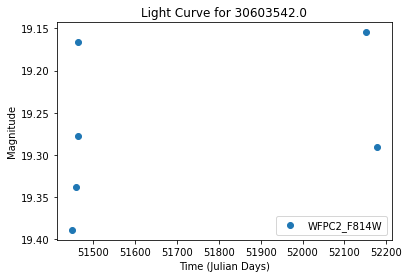

In [11]:
classified_list = implement_classifier(352)
for event_list in classified_list:
    print(event_list)
    print(len(event_list[1]))
    print()
        
make_lightcurve(30603542.0)

### Make Feature Vector Part 2, Electric Boogaloo

In [39]:
#we need a second feature vector to fully realize our mission, creating the ultimate dataframe, the ultimate matrix
#the monster matrix. actually though, we need to put the numerical data from our classified stuff and link it up
#with the first feature vector
'''
- Max number of flare ups + filter
- Max number of flare downs + filter
- Max number of flats + filter
- Duration of max flare up, down + filters
- Delta mag of max flare up, down + filters
- Number of filters that registered that max flare up, max flare down
- Baseline for max flare up and max flare down: comparing starting and ending magnitudes
- Is there a flare up before a flare down? True or False
'''
def feature_vector_p2(matchid):
    #first call implement_classifier function to load our master lists
    master_up, master_down, master_flat, unique_filter_list = implement_classifier(matchid)
    
    #--- All of this below are the max number of flare ups, downs, and flats
    
    #max number of flare ups
    up_nums = []
    for up_list in master_up:
        #append number of flare ups for a given filter and matchid
        up_nums.append(len(up_list))
    
    #pull the maximum number of flare ups for a filter for a matchid
    max_flare_up = max(up_nums)
    #pulls the index of the max up_nums value
    max_flare_up_index = np.argmax(up_nums)
    #finds the filter associated to that index
    max_flare_up_filter = unique_filter_list[max_flare_up_index]
    
    #max number of flare downs
    down_nums = []
    for down_list in master_down:
        #append number of flare downs for a given filter and matchid
        down_nums.append(len(down_list))
    
    #pull the maximum number of flare ups for a filter for a matchid
    max_flare_down = max(down_nums)
    #pulls the index of the max down_nums value
    max_flare_down_index = np.argmax(down_nums)
    #finds the filter associated to that index
    max_flare_down_filter = unique_filter_list[max_flare_down_index]
    
    #max number of flats
    flat_nums = []
    for flat_list in master_flat:
        #append number of flats for a given filter and matchid
        flat_nums.append(len(flat_list))
    
    #pull the maximum number of flats for a filter for a matchid
    max_flat = max(flat_nums)
    #pulls the index of the max flat_nums value
    max_flat_index = np.argmax(flat_nums)
    #finds the filter associated to that index
    max_flat_filter = unique_filter_list[max_flat_index]
    
    #--- Max magnitude for flare ups, downs, and flats
    
    #first lets find it for flare ups
    #max of the max mags that stores tuples of dt, dm
    #need to also confirm there's at least one max flare up
    if max_flare_up >= 1:
        max_mag_up = []
        for up_list in master_up:
            #will store the max mags
            mag_up = []
            #if up_list is empty, don't add any tuples
            if len(up_list) != 0:
                
                for up in up_list:
                    mag_up.append((up[1], up[2]))
                    
            else:
                mag_up.append((0,0))

            #maximum values for dm and dt
            max_mag = max(mag_up, key = lambda item:item[1])[1]
            max_time = max(mag_up, key = lambda item: item[1])[0]
            #append this value
            max_mag_up.append((max_time, max_mag))

        #find the max of max_mag_ups of dm and dt
        max_max_mag_up = max(max_mag_up, key = lambda item: item[1])[1]
        max_max_time_up = max(max_mag_up, key = lambda item: item[1])[0]
        #find the index
        max_max_mag_up_index = get_max_index_tuple(max_mag_up, 1, max_max_mag_up)
        #find the filter associated to that index
        max_max_mag_up_filter = unique_filter_list[max_max_mag_up_index]
            
    else:
        max_max_mag_up = 0
        max_max_time_up = 0
        max_max_mag_up_filter = 'NaN'
    
    #now flare downs
    #max of the max mags that stores tuples of dt, dm    
    #need to also confirm there's at least one max flare down
    if max_flare_down >= 1:
        max_mag_down = []
        for down_list in master_down:
            #will store the max mags
            mag_down = []
            #if up_list is empty, don't add any tuples
            if len(down_list) != 0:
                for down in down_list:
                    mag_down.append((down[1], down[2]))
                
            else:
                mag_down.append((0,0))

            #maximum values for dm and dt
            max_mag = min(mag_down, key = lambda item:item[1])[1]
            max_time = min(mag_down, key = lambda item: item[1])[0]
            #append this value
            max_mag_down.append((max_time, max_mag))

        #find the max of max_mag_ups dm and dt
        max_max_mag_down = min(max_mag_down, key = lambda item: item[1])[1]
        max_max_time_down = min(max_mag_down, key = lambda item: item[1])[0]
        #find the index
        max_max_mag_down_index = get_max_index_tuple(max_mag_down, 1, max_max_mag_down)
        #find the filter associated to that index
        max_max_mag_down_filter = unique_filter_list[max_max_mag_down_index]
        
    else:
        max_max_mag_down = 0
        max_max_time_down = 0
        max_max_mag_down_filter = 'NaN'

    #max duration of a flat
    #check to make sure at least one flat
    if max_flat >= 1:
        max_time_flat = []
        for flat_list in master_flat:
            time_flat = []
            #check to make sure the flat list has data; otherwise append 0
            if len(flat_list) != 0:
                for flat in flat_list:
                    time_flat.append(flat[1])
            
            else:
                time_flat.append(0)
                
            max_time = max(time_flat)
            max_time_flat.append(max_time)
        max_max_time_flat = max(max_time_flat)
        max_max_time_flat_index = np.argmax(max_time_flat)
        max_max_time_flat_filter = unique_filter_list[max_max_time_flat_index]
    else:
        max_max_time_flat = 0
        max_max_time_flat_filter = 'NaN'
        
    
    #--- Number of filters that register at least one flare up or flare down

    #let's first begin with flare ups
    num_filters_up = 0
    for up_list in master_up:
        #only increment counter if there's a flare up found in the sub list
        if len(up_list) != 0:
            num_filters_up += 1
            
    #flare down
    num_filters_down = 0
    for down_list in master_down:
        #only increment counter if there's a flare up found in the sub list
        if len(down_list) != 0:
            num_filters_down += 1
            
    
    #--- Baseline for max flare up and flare down
    #starting with max flare up
    #need the starting and ending magnitudes
    #first need to make individual dataframes for matchid and filter for both up and down
    matchid_up_filter_df = df.loc[(df['matchid']==matchid) & (df['filter'] == max_max_mag_up_filter)]
    matchid_down_filter_df = df.loc[(df['matchid']==matchid) & (df['filter'] == max_max_mag_down_filter)]
    #create the values for initial and final magnitudes for both up and down
    #only compute threshold for up down if there are any ups or downs
    
    #now to actually set the baseline, need to import the threshold first
    #first we need to check that the filter is not nan
    #if filter is nan then we set the threshold_up to be nan
    #first threshold_up
    if max_max_mag_up_filter != 'NaN':
        threshold_up = get_threshold(matchid, max_max_mag_up_filter)
        #threshold up
        m0_up = matchid_up_filter_df['lightcurve_m'].values[0]
        mf_up = matchid_up_filter_df['lightcurve_m'].values[-1]

        #now our up baseline
        if abs(m0_up - mf_up) >= threshold_up:
            baseline_up = m0_up - mf_up
        else:
            baseline_up = 0
    else:
        threshold_up = 'NaN'
        baseline_up = 0
        
    #now for threshold_down
    if max_max_mag_down_filter != 'NaN':
        threshold_down = get_threshold(matchid, max_max_mag_down_filter)
        
        m0_down = matchid_down_filter_df['lightcurve_m'].values[0]
        mf_down = matchid_down_filter_df['lightcurve_m'].values[-1]

        #now our down baseline
        if abs(m0_down - mf_down) >= threshold_down:
            baseline_down = m0_down - mf_down
        else:
            baseline_down = 0
    else:
        threshold_down = 'NaN'
        baseline_down = 0
        
        
    #--- Is there a flare up before a flare down?
    #first need to initialize our boolean, only when a condition is met is it true
    up_before_down = False
    
    #iterating through each row in the master_up list
    for i in range(len(master_up)):
        #for an ith list, first tuple in list, first element in tuple
        if (len(master_up[i]) != 0) and (len(master_down[i]) != 0): 
            if (master_up[i][0][0] <= master_down[i][0][0]):
                up_before_down = True
            
    return {'max num flare up': max_flare_up, 'max num flare up filter': max_flare_up_filter
        , 'max num flare down': max_flare_down, 'max num flare down filter': max_flare_down_filter
        , 'max flat': max_flat, 'max flat filter': max_flat_filter, 'max max mag up': max_max_mag_up
        , 'max max time up': max_max_time_up, 'max max mag up filter': max_max_mag_up_filter
        , 'max max mag down': max_max_mag_down, 'max max time down': max_max_time_down
        , 'max max mag down filter': max_max_mag_down_filter, 'max max time flat': max_max_time_flat
        , 'max max time flat filter': max_max_time_flat_filter, 'num filters up': num_filters_up
        , 'num filters down': num_filters_down, 'baseline up': baseline_up, 'baseline down': baseline_down
        , 'up before down': up_before_down, 'threshold up': threshold_up, 'threshold down': threshold_down
        }

In [40]:
feature_vector_p2(352)

{'max num flare up': 7,
 'max num flare up filter': 'ACS_F814W',
 'max num flare down': 7,
 'max num flare down filter': 'ACS_F606W',
 'max flat': 4,
 'max flat filter': 'ACS_F814W',
 'max max mag up': 0.7304989999999982,
 'max max time up': 92.77599102981185,
 'max max mag up filter': 'ACS_F606W',
 'max max mag down': -0.9085000000000001,
 'max max time down': 125.19971340033226,
 'max max mag down filter': 'ACS_F814W',
 'max max time flat': 51.07073053460772,
 'max max time flat filter': 'ACS_F814W',
 'num filters up': 2,
 'num filters down': 2,
 'baseline up': -0.3658999999999999,
 'baseline down': -0.527001000000002,
 'up before down': True,
 'threshold up': 0.015,
 'threshold down': 0.015}

In [14]:
'''
feature_vector_1_data = {
    'matchid': [], 'groupid': [], 'number of matchids sharing groupid': []
    , 'num unique filters': [], 'min median mag': []
    , 'max median mag': [], 'median median mag': []
    , 'median mad': [], 'median chi2': []
    , 'min delta T': [], 'max delta T': []
    , 'RA': [], 'DEC': [], 'galactic longitude': [], 'galactic latitude': []
}

unique_matchids = df['matchid'].unique()
feature_vector_pt1 = pd.DataFrame(feature_vector_1_data)

for i, matchid in enumerate(unique_matchids):
    feature_vector_pt1 = feature_vector_pt1.append(feature_vector_p1(matchid), ignore_index = True)
    percent = round(i/len(unique_matchids)*100, 3)
    print('progress: ' + str(percent) + '%', end='\r')
'''

feature_vector_pt1 = pd.read_csv(r'/Users/morty/Desktop/HCV/feature_vector_p1.csv')
feature_vector_pt1 = feature_vector_pt1.iloc[:,1:]

mag_less_21 = feature_vector_pt1.loc[feature_vector_pt1['min median mag'] < 21].reset_index()
mag_less_21 = mag_less_21.iloc[:,1:]

mag_less_21

,matchid,groupid,num other matchids in groupid,min median mag,max median mag,median median mag,min total time,max total time,median mad,median chi2,ra,dec,l,b
0,1708.0,1040910.0,16056.0,20.355200,19.656800,20.006000,1098.207315,1098.248866,0.035477,296.657237,269.795868,-29.207867,1.274670,-2.689401
1,4679.0,1040910.0,16056.0,20.963400,20.174550,20.568975,1098.206933,1098.248484,0.054976,299.202662,269.684357,-29.244835,1.194130,-2.623338
2,4897.0,1040910.0,16056.0,19.904700,19.121299,19.513000,3895.054648,4153.323777,0.046828,515.498440,269.783630,-29.201235,1.275120,-2.676836
3,5243.0,33688.0,314.0,17.224701,17.224701,17.224701,346.815253,346.815253,0.128085,1924.795777,265.182465,-53.693184,338.150452,-11.972563
4,8836.0,1061725.0,3790.0,20.849450,20.006850,20.428150,736.592763,736.594326,0.018044,27.833809,269.908020,-29.246920,1.289359,-2.793752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12552,108117427.0,1063416.0,7058.0,20.969100,20.257099,20.613100,957.504220,957.545395,0.016729,17.023309,269.699066,-29.197245,1.241850,-2.610801
12553,108135894.0,33688.0,314.0,20.646900,19.361900,19.398701,331.053720,346.815253,0.048644,86.342315,265.185364,-53.680752,338.162343,-11.967852
12554,108148721.0,33584.0,1002.0,19.495600,18.659901,18.796499,704.398037,704.452522,0.008342,22.374841,229.638000,2.066506,3.841840,46.787571
12555,108166460.0,12611.0,7563.0,20.765100,17.852200,18.908625,579.622345,2896.252975,0.007719,7.009731,201.657333,-47.475353,309.075149,14.976194


### Join our two feature vectors into a monster vector

In [15]:
#join our two vectors to create our big boy, monster megaman, dataframe
def frankenstein(matchid):
    #call the two feature vectors
    feature_vector_1 = feature_vector_p1(matchid)
    feature_vector_2 = feature_vector_p2(matchid)
    
    #create our monster vector
    monster_vector = {}
    monster_vector.update(feature_vector_1)
    monster_vector.update(feature_vector_2)
    return monster_vector

In [19]:
'''
#pull all the unique matchids
unique_matchids = mag_less_21['matchid'].unique()

big_frankie_data = {'matchid': [], 'groupid': [], 'number of matchids sharing groupid': []
        , 'num unique filters': [], 'min median mag': []
        , 'max median mag': [], 'median median mag': []
        , 'median mad': [], 'median chi2': []
        , 'min delta T': [], 'max delta T': []
        , 'RA': [], 'DEC': [], 'galactic longitude': [], 'galactic latitude': []'max num flare up': []
        , 'max num flare up filter': [], 'max num flare down': []
        , 'max num flare down filter': [], 'max flat': [], 'max flat filter': []
        , 'max max mag up': [], 'max max time up': []
        , 'max max mag up filter': [],'max max mag down': []
        , 'max max time down': [], 'max max mag down filter': []
        , 'max max time flat': [], 'max max time flat filter': []
        , 'num filters up': [], 'num filters down': []
        , 'baseline up': [], 'baseline down': [], 'up before down': [], 'threshold up': [], 'threshold down': []
        }

big_frankie_df = pd.DataFrame(big_frankie_data)

for i, matchid in enumerate(unique_matchids):
    big_frankie_df = big_frankie_df.append(frankenstein(matchid), ignore_index = True)
    percent = round(i/len(unique_matchids)*100, 3)
    print('progress: ' + str(percent) + '%', end='\r')
'''
    
#big_frankie_df.to_csv('big_frankie.csv')
monster_matrix_simple = pd.read_csv(r'/Users/morty/Desktop/HCV/monster_matrix_simple.csv')
monster_matrix_simple = monster_matrix_simple.iloc[:,1:]
monster_matrix_simple

,matchid,groupid,num other matchids in groupid,min median mag,max median mag,median median mag,min total time,max total time,median mad,median chi2,...,max max time flat,max max time flat filter,num filters up,num_filters_down,num unique filters,baseline up,baseline down,up before down,threshold down,treshold up
0,1708.0,1040910.0,16056.0,20.355200,19.656800,20.006000,1098.207315,1098.248866,0.035477,296.657237,...,120.593553,ACS_F606W,2.0,2.0,2.0,-0.081499,-0.081499,0.0,0.015,0.015
1,4679.0,1040910.0,16056.0,20.963400,20.174550,20.568975,1098.206933,1098.248484,0.054976,299.202662,...,50.760701,ACS_F606W,2.0,2.0,2.0,0.061100,0.061100,1.0,0.015,0.015
2,4897.0,1040910.0,16056.0,19.904700,19.121299,19.513000,3895.054648,4153.323777,0.046828,515.498440,...,258.419958,ACS_F814W,2.0,2.0,2.0,0.185702,0.134800,1.0,0.015,0.015
3,5243.0,33688.0,314.0,17.224701,17.224701,17.224701,346.815253,346.815253,0.128085,1924.795777,...,65.829492,ACS_F658N,1.0,1.0,1.0,-0.173300,-0.173300,0.0,0.015,0.015
4,8836.0,1061725.0,3790.0,20.849450,20.006850,20.428150,736.592763,736.594326,0.018044,27.833809,...,67.025627,WFC3_F814W,2.0,2.0,2.0,-0.040699,-0.040699,0.0,0.015,0.015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12552,108117427.0,1063416.0,7058.0,20.969100,20.257099,20.613100,957.504220,957.545395,0.016729,17.023309,...,396.748334,WFC3_F606W,2.0,2.0,2.0,0.020100,0.020100,1.0,0.015,0.015
12553,108135894.0,33688.0,314.0,20.646900,19.361900,19.398701,331.053720,346.815253,0.048644,86.342315,...,203.770888,ACS_F658N,3.0,3.0,3.0,-0.027100,-0.027100,1.0,0.015,0.015
12554,108148721.0,33584.0,1002.0,19.495600,18.659901,18.796499,704.398037,704.452522,0.008342,22.374841,...,701.915814,WFC3_F814W,3.0,3.0,3.0,0.031198,0.031198,0.0,0.015,0.015
12555,108166460.0,12611.0,7563.0,20.765100,17.852200,18.908625,579.622345,2896.252975,0.007719,7.009731,...,453.480786,WFC3_F606W,4.0,4.0,4.0,0.000000,0.000000,1.0,0.015,0.015


### Now let's apply our restrictions

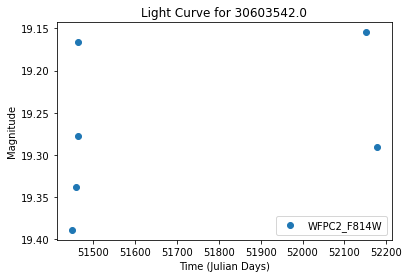

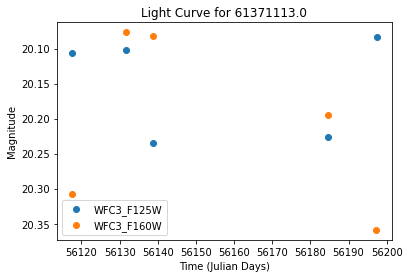

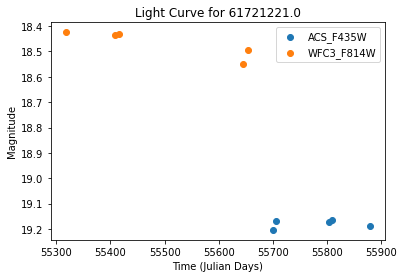

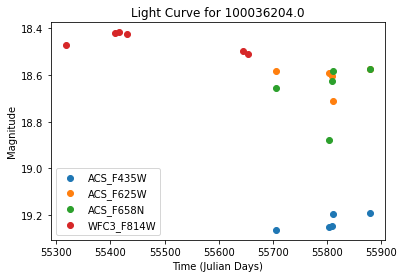

In [36]:
#one flare up, one flare down, up before down
r1_monster_matrix_simple = monster_matrix_simple.loc[(monster_matrix_simple['max num flare up'] == 1) & 
                                                    (monster_matrix_simple['max num flare down'] == 1)& 
                                                    (monster_matrix_simple['up before down'] == 1)].reset_index()
#409 options that fit this resitriction
r1_monster_matrix_simple = r1_monster_matrix_simple.iloc[:,1:]


#time restraints: flare up ~ [7,20], flare down ~ [20, 720]
r2_monster_matrix_simple = r1_monster_matrix_simple.loc[(r1_monster_matrix_simple['max max time up'] > 7) &
                                                       (r1_monster_matrix_simple['max max time up'] < 20) &
                                                       (r1_monster_matrix_simple['max max time down'] > 20) &
                                                       (r1_monster_matrix_simple['max max time down'] < 720)].reset_index()
#9 options now!!
r2_monster_matrix_simple = r2_monster_matrix_simple.iloc[:,1:]

#our third restriction, does it lie outside the galactic plane?
r3_monster_matrix_simple = r2_monster_matrix_simple.loc[abs(r2_monster_matrix_simple['b']) > 20].reset_index()
#left with 6 total options
#r3_monster_matrix_simple = r3_monster_matrix_simple.iloc[:,1:]

r3_monster_matrix_simple

os.chdir('/Users/morty/Desktop/HCV/TDE candidates r3 simple')

r3_unique_matchids = r3_monster_matrix_simple['matchid'].unique()

for matchid in r3_unique_matchids:
    make_lightcurve(matchid)

In [47]:
df.loc[(df['matchid']==12670)]['mad']

734    0.017886
735    0.017886
736    0.017886
737    0.017886
738    0.017886
739    0.043436
740    0.043436
741    0.043436
742    0.043436
743    0.043436
744    0.081728
745    0.081728
746    0.081728
747    0.081728
748    0.081728
749    0.081728
Name: mad, dtype: float64

### Find median median mag range within the HCV

In [27]:
def mmm(matchid):
    matchid_df = df.loc[df['matchid'] == matchid]
    
    unique_filter_list = matchid_df['filter'].unique()
    
    median_mag_list = []
    for item in unique_filter_list:
        filter_matchid_df = matchid_df.loc[matchid_df['filter'] == item]
        median_mag = median(filter_matchid_df['lightcurve_m'].values)
        
        median_mag_list.append(median_mag)
        
    return median(median_mag_list)

In [28]:
unique_matchids = df['matchid'].unique()

betta = []
for i, matchid in enumerate(unique_matchids):
    betta.append(mmm(matchid))
    percent = round(i/len(unique_matchids)*100, 3)
    print('progress: ' + str(percent) + '%', end='\r')
    
max(betta)

KeyboardInterrupt: 